In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import re


In [3]:
df = pd.read_csv('Documents/tracks.csv/tracks.csv')
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


# Data cleaning

In [ ]:
#checking for missing values

In [16]:
pd.isnull(df).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [18]:
df[df['name'].isna()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
226336,4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,0,-12.280,0,0.0299,0.0433,0.000064,0.5160,0.692,156.465,1
510975,04d5kbLvSAIBt3pGcljdhC,NaN,0,184293,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.426,0.285,11,-11.970,1,0.0466,0.9950,0.264000,0.2930,0.583,135.661,4
510976,05tRkgyxVdwMePGqOXMDYU,NaN,0,191587,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.344,0.186,0,-13.495,1,0.0745,0.9950,0.000000,0.1150,0.290,79.591,1
510978,0YAMRgAQH6tkTh4sWNXr8L,NaN,0,191573,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.316,0.257,3,-13.611,0,0.0549,0.9950,0.769000,0.5190,0.529,68.682,3
510979,1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,1,-12.847,1,0.0646,0.9960,0.000000,0.4530,0.608,70.379,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517206,6OH9mz9aFbGlbf74cBwYWD,NaN,2,209760,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.506,0.598,7,-4.672,0,0.0635,0.7710,0.000001,0.6910,0.800,91.172,4
517215,15RqFDA86slfzujSQMEX4i,NaN,2,257280,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.612,0.615,5,-5.609,1,0.0551,0.8540,0.000023,0.0541,0.809,90.536,4
520127,0hKA9A2JPtFdg0fiMhyjQD,NaN,6,194081,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1974-12-31,0.471,0.369,4,-12.927,0,0.1460,0.9680,0.001100,0.1410,0.766,94.063,4
525238,1kR4gIb7nGxHPI3D2ifs59,NaN,26,289440,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.501,0.583,7,-9.460,0,0.0605,0.6900,0.003960,0.0747,0.734,138.391,4


In [15]:
#replacing missing values 
df['name'].fillna('Unknown',inplace=True)

In [16]:
df.isna().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [ ]:
#Analysis

In [27]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [4]:

df['duration_ms'] = df['duration_ms']/1000
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,230.051167,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,126.526087,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,175.093000,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,214.893000,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,263.867000,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5621.218000,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [5]:
#take standard duration tracks from 1 minute to 20 minutes
df = df.query('duration_ms>=60 and duration_ms<=1200')

In [6]:
df_tracks = df.drop(['id','id_artists'], axis = 1)
df_tracks['artists'] = df_tracks['artists'].str.replace(r'\[|\]|,', '')
df_tracks['artists'] = df_tracks['artists'].str.replace("'","")

df_tracks.head(5)

<ipython-input-6-c423500c8059>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tracks['artists'] = df_tracks['artists'].str.replace(r'\[|\]|,', '')


,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Carve,6,126.903,0,Uli,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,Capítulo 2.16 - Banquero Anarquista,0,98.200,0,Fernando Pessoa,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,Vivo para Quererte - Remasterizado,0,181.640,0,Ignacio Corsini,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,El Prisionero - Remasterizado,0,176.907,0,Ignacio Corsini,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,Lady of the Evening,0,163.080,0,Dick Haymes,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


<AxesSubplot:>

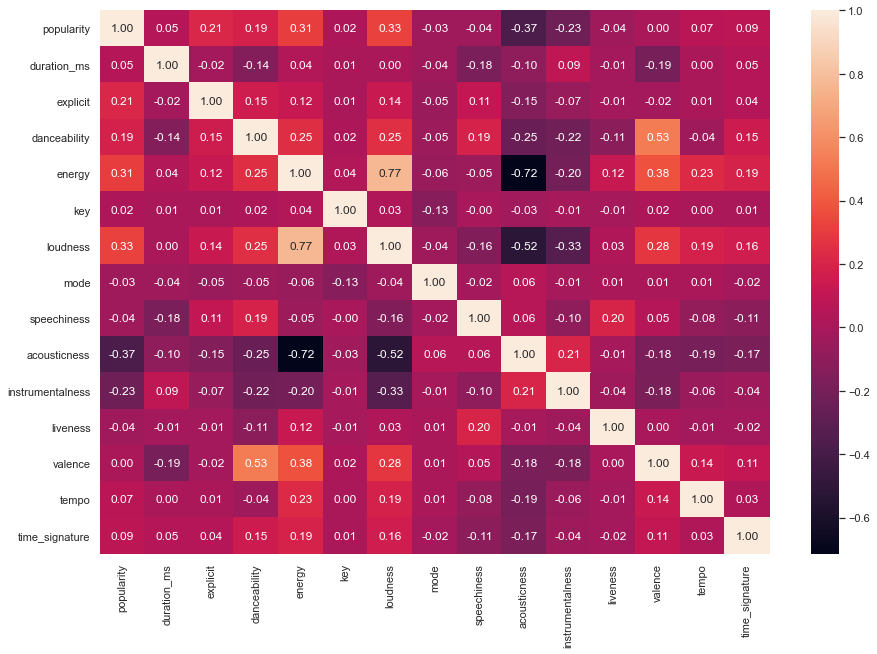

In [7]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_tracks.corr(), annot=True, fmt=".2f",)

In [21]:
#Q1
df_tracks.sort_values(by = 'popularity', ascending=False).head(10)

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,Peaches (feat. Daniel Caesar & Giveon),100,198.082,1,Justin Bieber Daniel Caesar Giveon,2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,drivers license,99,242.014,1,Olivia Rodrigo,2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,Astronaut In The Ocean,98,132.780,0,Masked Wolf,2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92811,telepatía,97,160.191,0,Kali Uchis,2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92810,Save Your Tears,97,215.627,1,The Weeknd,2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92813,Blinding Lights,96,200.040,0,The Weeknd,2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
93805,Leave The Door Open,96,242.096,0,Bruno Mars Anderson .Paak Silk Sonic,2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92814,The Business,95,164.000,0,Tiësto,2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
91866,Streets,94,226.987,1,Doja Cat,2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4
93807,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,94,169.153,0,Riton Nightcrawlers Mufasa & Hypeman Dopamine,2021-01-15,0.824,0.862,2,-3.424,1,0.1260,0.00760,0.000132,0.3030,0.801,122.980,4


array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'explicit'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>]],
      dtype=object)

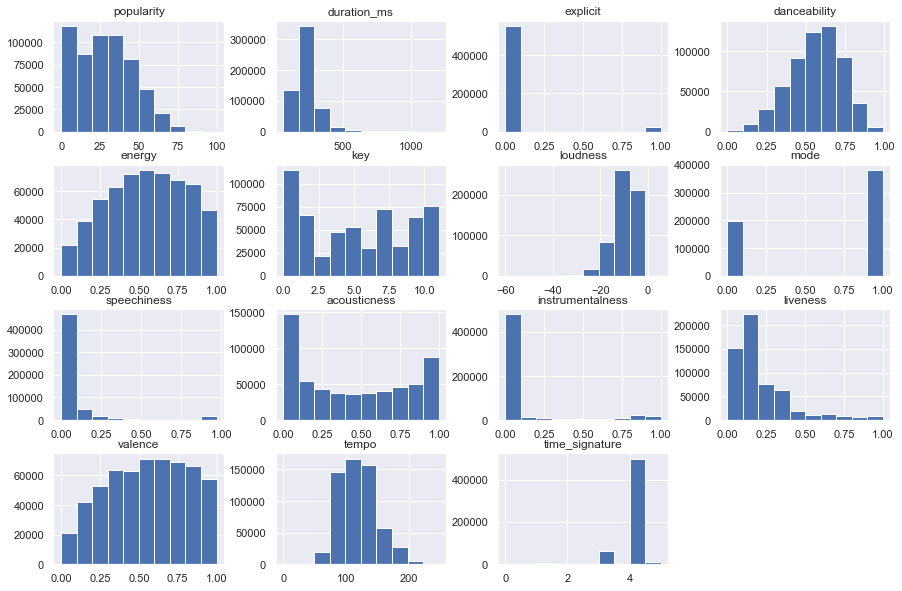

In [22]:
df_tracks.hist()

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'explicit'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>]],
      dtype=object)

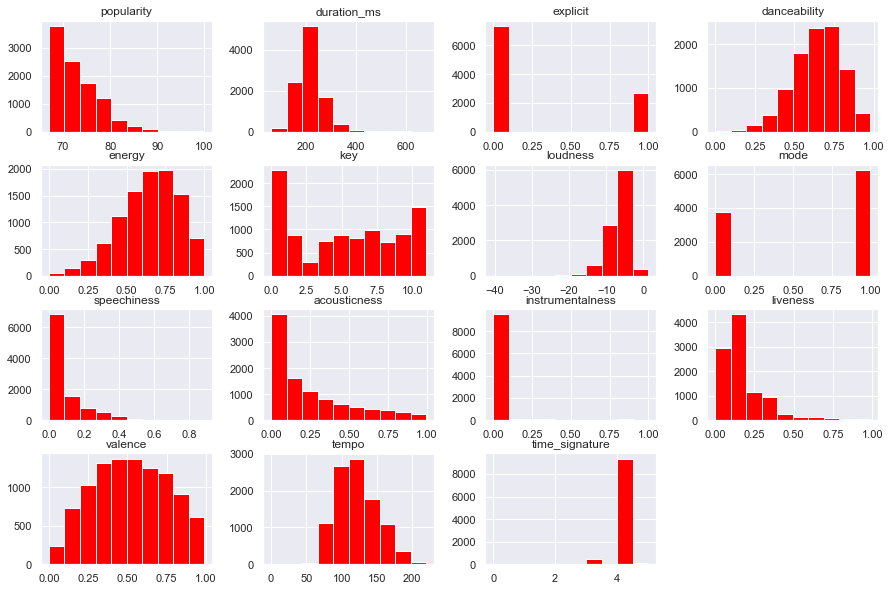

In [23]:
df_top_1000 = df_tracks.sort_values(by = 'popularity', ascending=False).head(10000)
df_top_1000.hist(color='red')

In [24]:
df_tracks_popular = df_tracks.groupby(by ='popularity').mean().reset_index()
df_tracks_popular

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,220.453136,0.012468,0.526698,0.356908,5.168197,-13.103381,0.694673,0.146765,0.773132,0.340382,0.212993,0.522200,112.232176,3.787187
1,1,220.252313,0.011070,0.515507,0.404108,5.207157,-12.933827,0.672531,0.138318,0.670939,0.249923,0.221637,0.484768,114.764511,3.807517
2,2,214.407670,0.011040,0.524902,0.435065,5.215608,-12.192801,0.680485,0.135253,0.633320,0.233283,0.226340,0.518900,115.667927,3.812534
3,3,213.658417,0.010088,0.518758,0.445226,5.178777,-11.958153,0.670923,0.098603,0.625435,0.214438,0.230638,0.534664,116.048804,3.830673
4,4,215.563190,0.006912,0.521025,0.444092,5.195135,-11.896632,0.677123,0.092822,0.623852,0.187749,0.222136,0.537353,116.074261,3.834508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,221.068000,0.000000,0.550000,0.673000,3.000000,-6.949000,1.000000,0.046100,0.091730,0.000048,0.091200,0.526500,159.546500,4.000000
97,97,187.909000,0.500000,0.666500,0.675000,5.500000,-7.251500,0.500000,0.040550,0.066600,0.000006,0.373000,0.598500,101.010500,4.000000
98,98,132.780000,0.000000,0.778000,0.695000,4.000000,-6.865000,0.000000,0.091300,0.175000,0.000000,0.150000,0.472000,149.996000,4.000000
99,99,242.014000,1.000000,0.585000,0.436000,10.000000,-8.761000,1.000000,0.060100,0.721000,0.000013,0.105000,0.132000,143.874000,4.000000


<AxesSubplot:xlabel='popularity', ylabel='acousticness'>

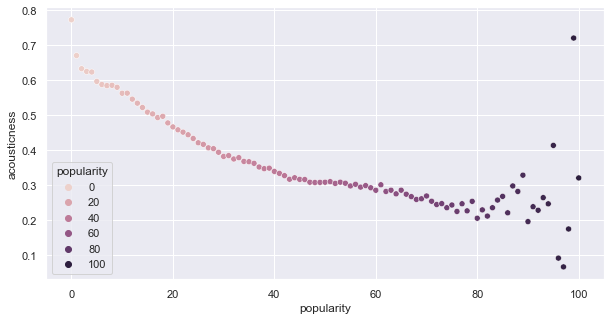

In [25]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = df_tracks_popular, x = 'popularity', y = 'acousticness', hue = 'popularity')

<AxesSubplot:xlabel='popularity', ylabel='energy'>

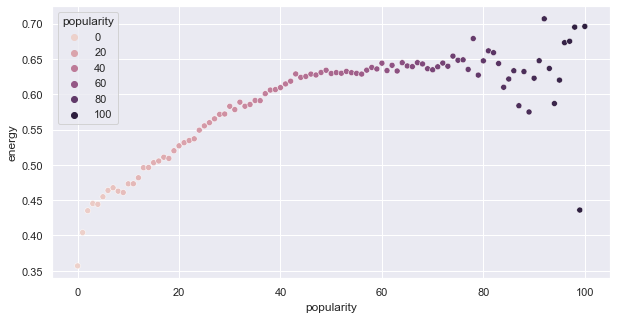

In [37]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = df_tracks_popular, x = 'popularity', y = 'energy', hue = 'popularity')

<AxesSubplot:xlabel='popularity', ylabel='explicit'>

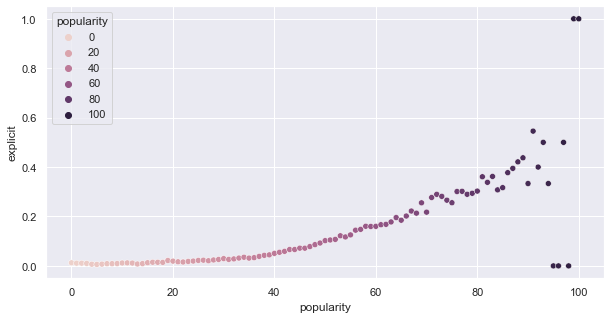

In [38]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = df_tracks_popular, x = 'popularity', y = 'explicit', hue = 'popularity')

<AxesSubplot:xlabel='popularity', ylabel='instrumentalness'>

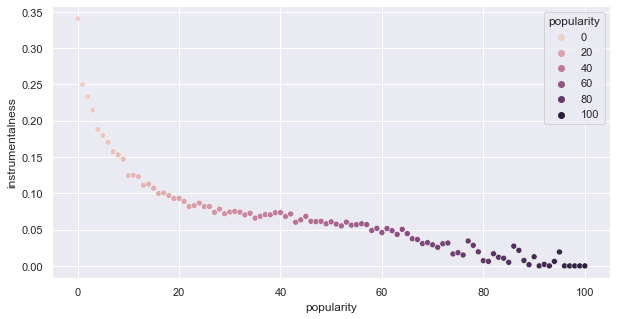

In [39]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = df_tracks_popular, x = 'popularity', y = 'instrumentalness', hue = 'popularity')

<AxesSubplot:xlabel='popularity', ylabel='loudness'>

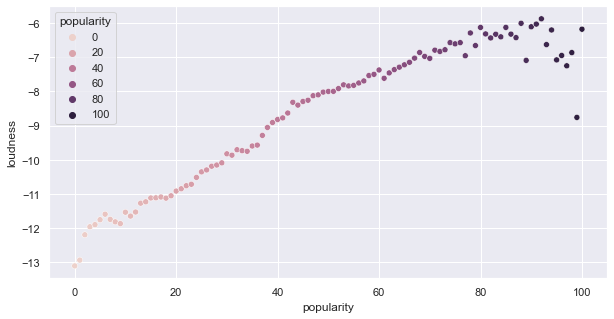

In [40]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = df_tracks_popular, x = 'popularity', y = 'loudness', hue = 'popularity')

<AxesSubplot:xlabel='popularity', ylabel='danceability'>

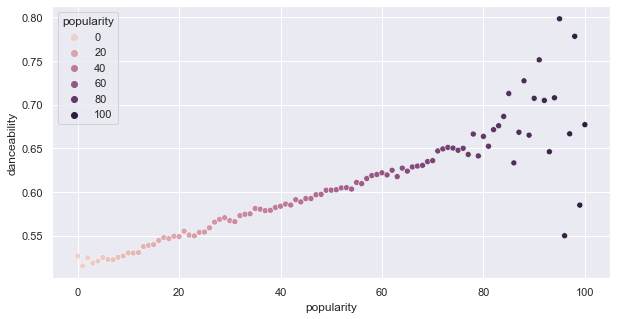

In [41]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = df_tracks_popular, x = 'popularity', y = 'danceability', hue = 'popularity')

<AxesSubplot:xlabel='popularity', ylabel='valence'>

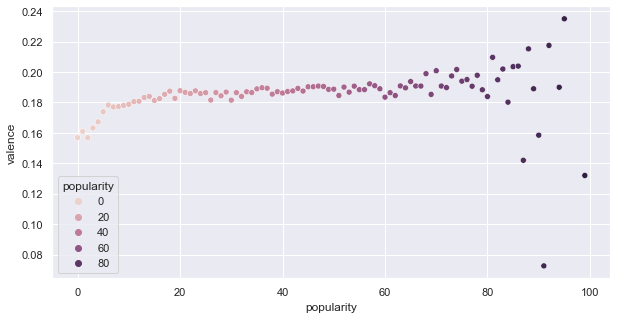

In [42]:
#Q2
sns.set(rc={'figure.figsize':(10,5)})
df_low_valence = df_tracks.query('valence<=0.3')
sns.scatterplot(data = df_low_valence.groupby(by = 'popularity').mean().reset_index(), x = 'popularity', y = 'valence',
                hue = 'popularity')

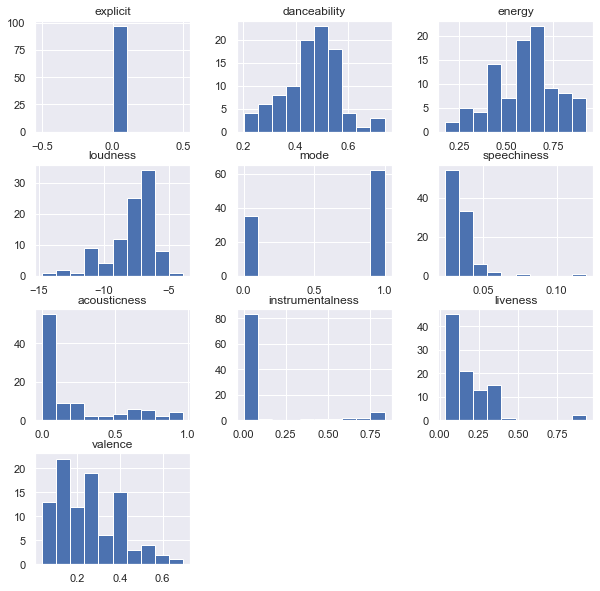

In [8]:
#Q3
sns.set(rc={'figure.figsize':(10,10)})
df_coldplay = df_tracks.query("artists == 'Coldplay'").drop(['popularity','duration_ms','tempo','key', 'time_signature'], axis = 1)
df_coldplay.hist();

In [9]:
df_coldplay_mean = df_coldplay.groupby(by='artists').mean().transpose()
df_coldplay_mean

artists,Coldplay
explicit,0.000000
danceability,0.455536
energy,0.602588
loudness,-7.792258
mode,0.639175
speechiness,0.034971
acousticness,0.212313
instrumentalness,0.098022
liveness,0.194494
valence,0.257946


In [10]:
df_tracks_80_popular = df_tracks[df_tracks['popularity']>=80].drop(['popularity','duration_ms','tempo','key', 'time_signature'], axis = 1)
df_tracks_80_popular['artists'] = '80 popularity'

df_coldplay_mean['80 popularity'] = df_tracks_80_popular.groupby(by='artists').mean().transpose()['80 popularity']

df_comparing = df_coldplay_mean.reset_index()
df_comparing.columns = ['Feature','Coldplay', '80 Popularity']
df_comparing['Diff'] = df_comparing['80 Popularity']-df_comparing['Coldplay']
df_comparing

,Feature,Coldplay,80 Popularity,Diff
0,explicit,0.000000,0.343816,0.343816
1,danceability,0.455536,0.671532,0.215996
2,energy,0.602588,0.640672,0.038085
3,loudness,-7.792258,-6.297527,1.494730
4,mode,0.639175,0.597484,-0.041691
5,speechiness,0.034971,0.101604,0.066633
6,acousticness,0.212313,0.232465,0.020152
7,instrumentalness,0.098022,0.010599,-0.087423
8,liveness,0.194494,0.170120,-0.024374
9,valence,0.257946,0.517347,0.259400


In [11]:
df_comparing.sort_values(by = 'Diff', ascending = False).style.bar(subset=['Diff'], align = 'mid')

,Feature,Coldplay,80 Popularity,Diff
3,loudness,-7.792258,-6.297527,1.494730
0,explicit,0.000000,0.343816,0.343816
9,valence,0.257946,0.517347,0.259400
1,danceability,0.455536,0.671532,0.215996
5,speechiness,0.034971,0.101604,0.066633
2,energy,0.602588,0.640672,0.038085
6,acousticness,0.212313,0.232465,0.020152
8,liveness,0.194494,0.170120,-0.024374
4,mode,0.639175,0.597484,-0.041691
7,instrumentalness,0.098022,0.010599,-0.087423
